FragMapper
==========

Maintained by Seth Veenbaas

In [1]:
import rnavigate as rnav


## Import data to RNAvigate and run Fragmapper analysis


In [2]:
from rnavigate.examples import quinaxoline, linezolid, methyl


The above import statement is equivalent to running the following code from
inside `/path/to/RNAvigate/rnavigate/examples/rrna_fragmap/`.

```python
# Reference structure data is shared between samples
common_data = rnav.Sample(
    sample='6HA1 - LSU',
    sequence='6HA1_LSU.fasta',
    pdb={'pdb': '6HA1_LSU.pdb',
         'sequence': 'sequence',
         'chain': 'A'},
    ss='6HA1_LSU.json'
)
# Flip structure diagram along x and y axes
common_data.data['ss'].data["X_coordinate"] *= -1
common_data.data['ss'].data["Y_coordinate"] *= -1
# Quinaxoline test sample
quinoxiline = rnav.Sample(
    'B. sub rRNA FragMaP: quinoxiline',
    inherit=common_data,
    shapemap='2_QN_DMSO_subtracted_LSU_profile.txt'
)
# Linezolid test sample
lnz = rnav.Sample(
    'B. sub rRNA FragMaP: linezolid',
    inherit=common_data,
    shapemap='2_ZLD_DMSO_subtracted_LSU_profile.txt'
)
# Methyl control sample
met = rnav.Sample(
    'B. sub rRNA FragMaP: methyl',
    inherit=common_data,
    shapemap='2_Methyl_DMSO_subtracted_LSU_profile.txt'
)
```


In [3]:
# Run Fragmapper analysis and saving a FragMaP profile object
# NOTE: Fragmapper requires 1 test sample and 1 control sample
qn_fm = rnav.analysis.Fragmapper(quinaxoline, methyl)
lnz_fm = rnav.analysis.Fragmapper(linezolid, methyl)


c:\Users\psirv\anaconda3\envs\RNAvigate\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\psirv\anaconda3\envs\RNAvigate\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\psirv\anaconda3\envs\RNAvigate\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\psirv\anaconda3\envs\RNAvigate\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## FragMaP scatter plots

### Scatter plot with FragMaP profiles

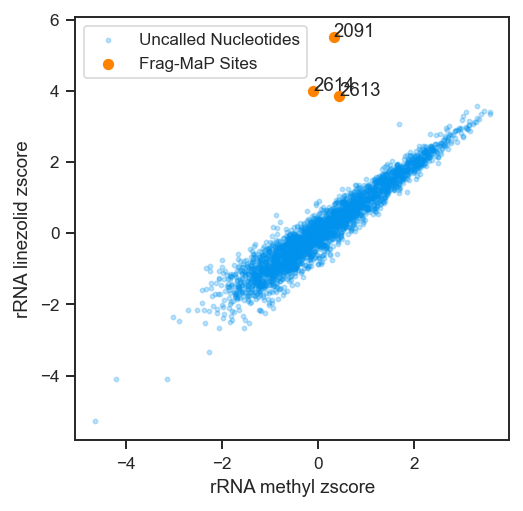

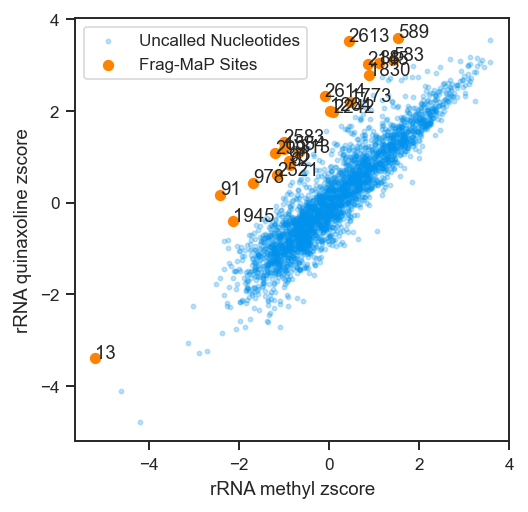

In [4]:
# FragMapper.plot_scatter()
fig, ax = lnz_fm.plot_scatter(column='zscore')
fig, ax = qn_fm.plot_scatter(column='zscore')


### Scatter plot with raw mutation rates

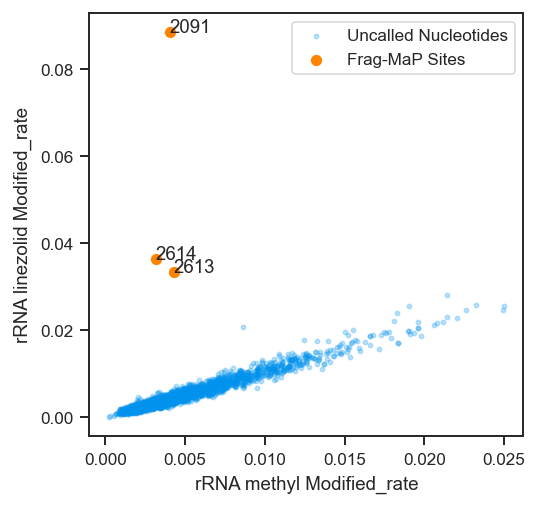

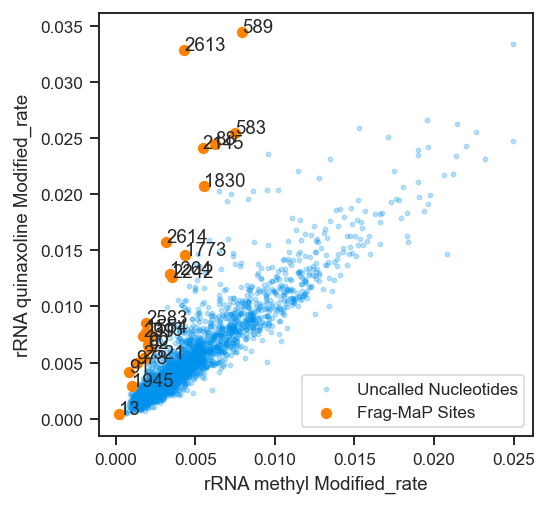

In [5]:
# FragMaP_profile_object.plot_scatter()
fig1, ax1 = lnz_fm.plot_scatter()
fig2, ax2 = qn_fm.plot_scatter()


## View FragMaP profile

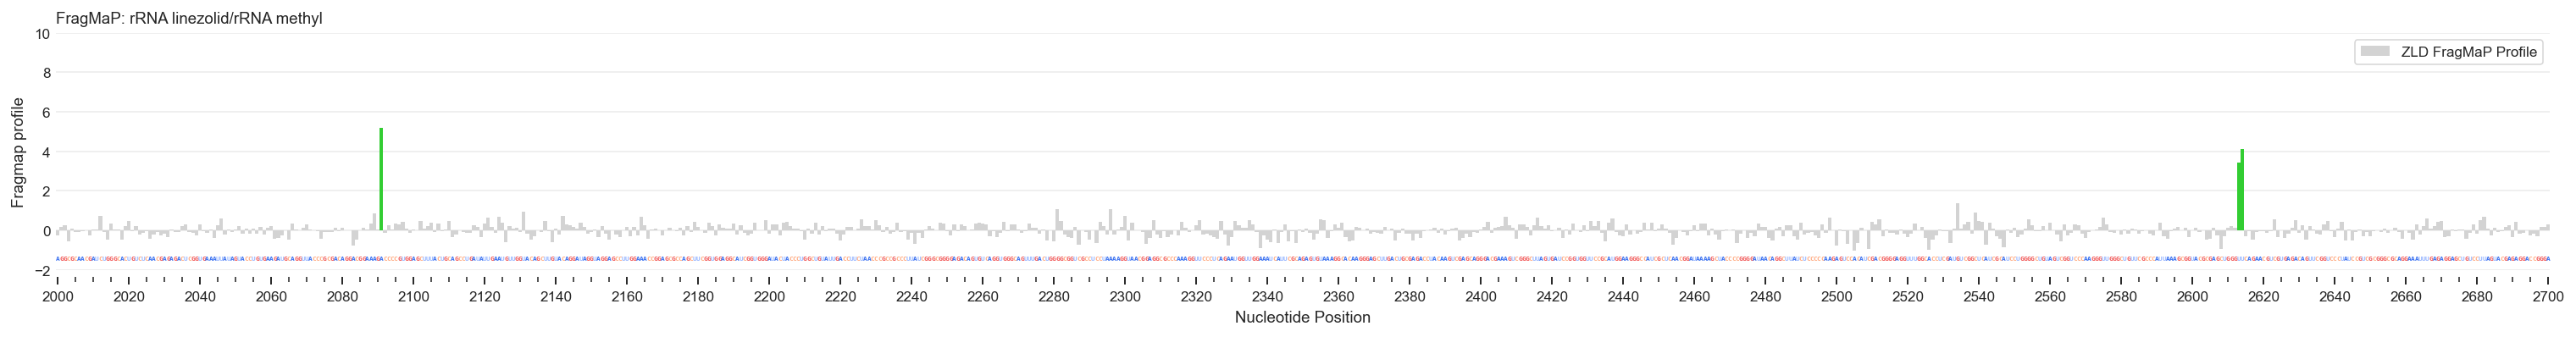

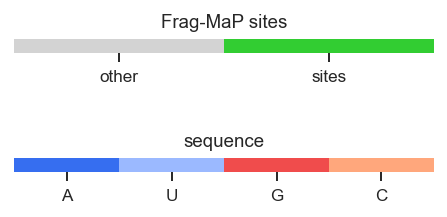

In [6]:
plot = rnav.plot_profile(
    samples=[lnz_fm],
    profile="fragmap",
    region=[2000, 2700],
    sequence='shapemap',
    plot_error=False
    )
ax = plot.axes[0, 0]
ax.set(ylim=[-2, 10])
ax.legend(['ZLD FragMaP Profile']);


## View raw sample data

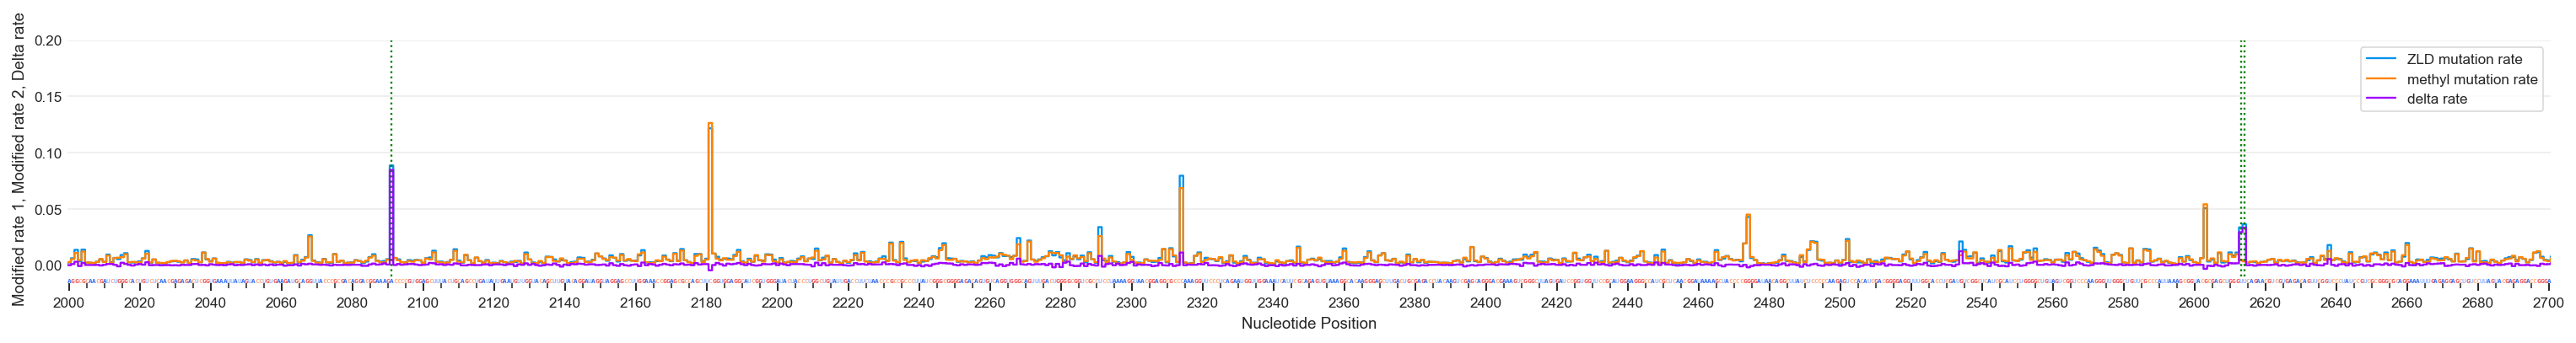

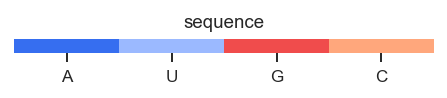

In [7]:
plot = rnav.plot_skyline(
    samples=[lnz_fm],
    profile="fragmap",
    columns=["Modified_rate_1", "Modified_rate_2", "Delta_rate"],
    sequence="shapemap",
    region=[2000, 2700],
    annotations=["fragmap_sites"],
    annotations_mode='bar',
    plot_kwargs={"subplot_kw": {"ylim": (-0.01, 0.2)}},
    )

plot.axes[0, 0].legend(
    ["ZLD mutation rate", "methyl mutation rate", "delta rate"]
    );


## View FragMaP site annotation in secondary structure

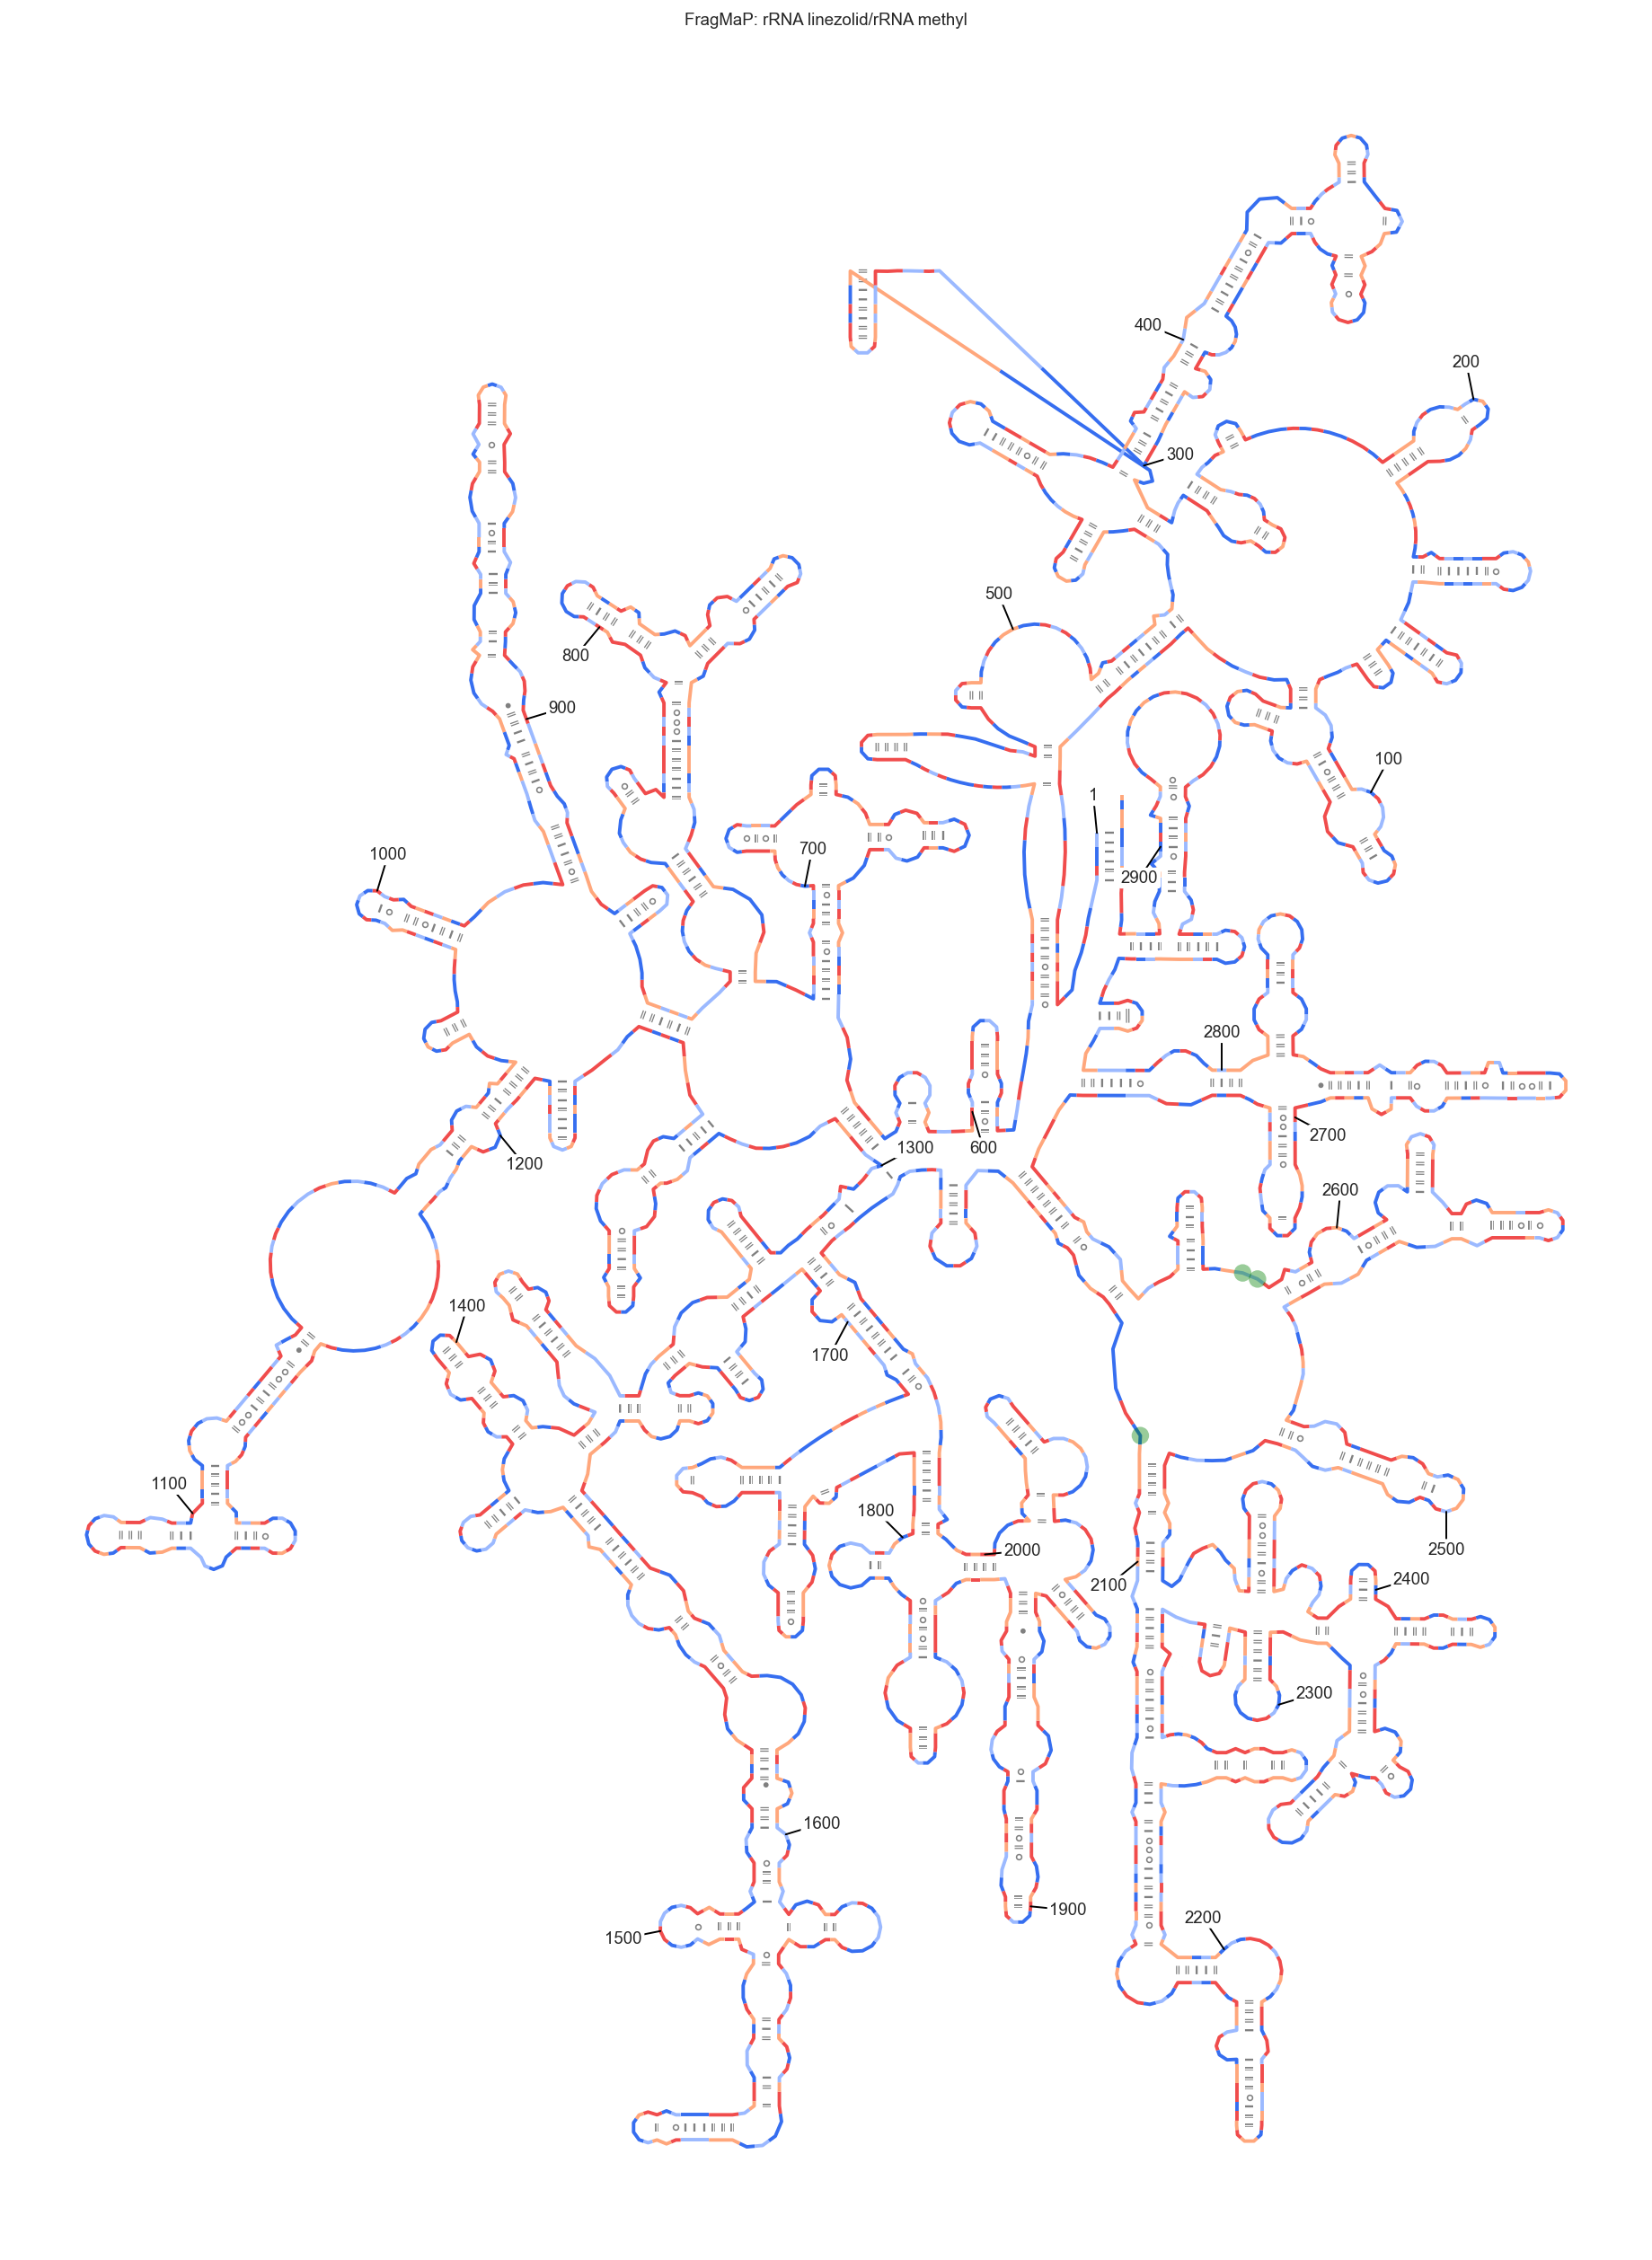

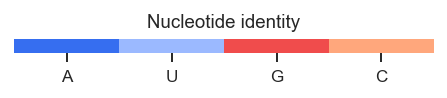

In [8]:
with rnav.styles.Settings({'ss': {'structure': {'linewidth': 2}}}):
    plot = rnav.plot_ss(
        [lnz_fm],
        profile='fragmap',
        structure='ss',
        colors={'structure': 'sequence',
                'nucleotides': 'none',},
        bp_style='conventional',
        annotations=['fragmap_sites'],
        nt_ticks=100
        )
